In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
abalone = pd.read_csv('C:/Users/jycha/Downloads/abalone.data.csv', names=['Sex', 'Length', 'Diameter continuous', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

In [53]:
abalone

,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [54]:
abalone.columns

Index(['Sex', 'Length', 'Diameter continuous', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [55]:
abalone.isna().sum()

Sex                    0
Length                 0
Diameter continuous    0
Height                 0
Whole weight           0
Shucked weight         0
Viscera weight         0
Shell weight           0
Rings                  0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
abalone['Sex']=le.fit_transform(abalone['Sex'])
abalone.head()

,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [57]:
#Splitting the data into training and test test
X = abalone.iloc[:,0:9].values
y = abalone.iloc[:,7].values

In [58]:
X=abalone.drop('Shell weight',axis=1)
X.head()

,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,7


In [59]:
y

array([0.15 , 0.07 , 0.21 , ..., 0.308, 0.296, 0.495])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (8,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [62]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
98/98 [==============================] - 1s 5ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0093 - m

In [63]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010


[0.001034072833135724, 0.001034072833135724]

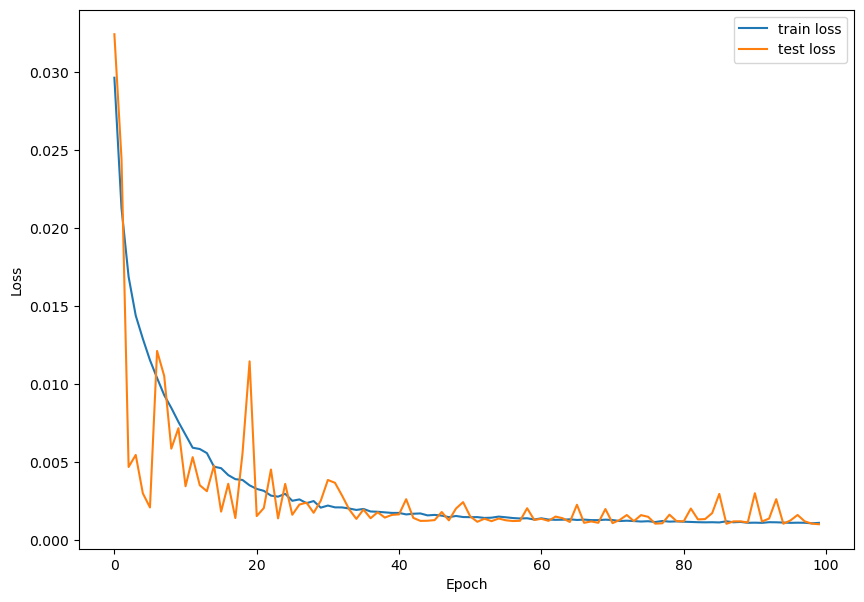

In [64]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

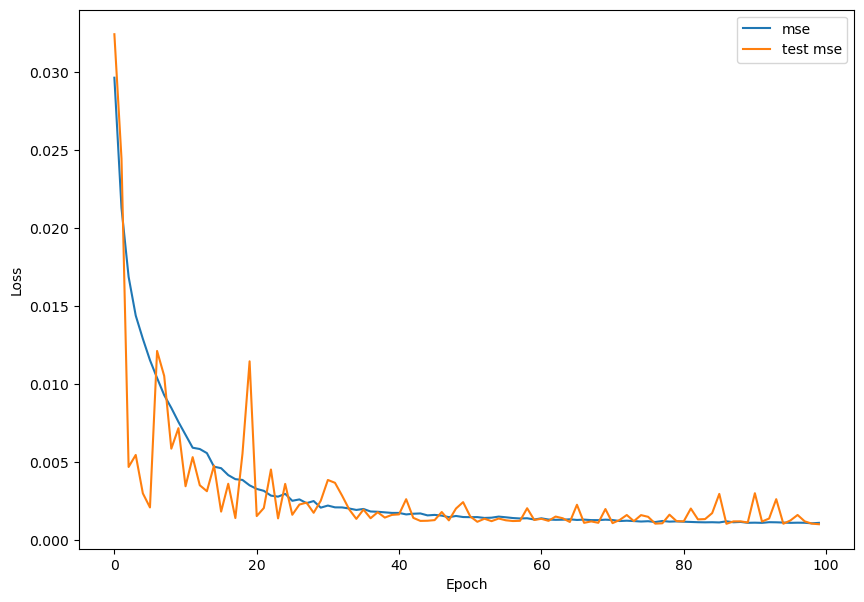

In [65]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()